---

# Prácticas funciones de trazado para EDA

---

## Imports

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

## conjunto de datos


In [8]:
!pip install scikit-learn

In [9]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

URLError: <urlopen error [WinError 10054] Se ha forzado la interrupción de una conexión existente por el host remoto>

In [3]:
df = pd.DataFrame(dataset.data,
                  columns=[dataset.feature_names]
                  )
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
df.shape

(20640, 8)

In [5]:
df['price'] = 100_000 * dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


- Detección de NUll

In [6]:

df.isna().sum().sum()

0

In [7]:
df.columns

MultiIndex([(    'MedInc',),
            (  'HouseAge',),
            (  'AveRooms',),
            ( 'AveBedrms',),
            ('Population',),
            (  'AveOccup',),
            (  'Latitude',),
            ( 'Longitude',),
            (     'price',)],
           )

In [8]:
df.columns = df.columns.get_level_values(0)

In [9]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

---

## Function:  Mapa de calor de correlación medio enmascarado


In [10]:
def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)

    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(), mask=mask, annot=True, cmap='coolwarm')

    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    
    plt.ylabel('')    
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


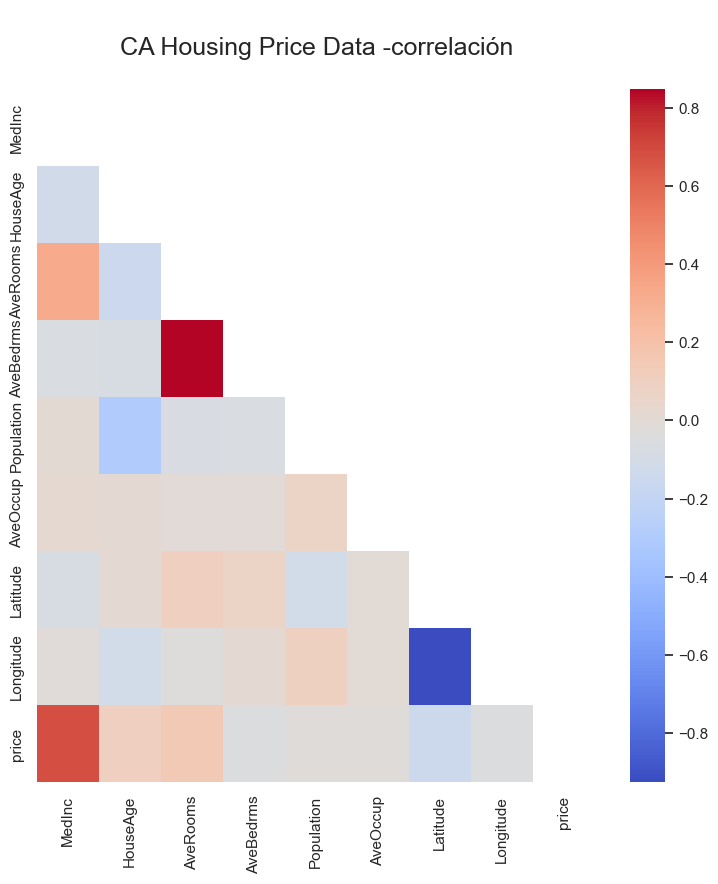

In [11]:
half_masked_corr_heatmap(df,
                         'CA Housing Price Data -correlación',
                         )

---

## Function:  Corr a una variable objetivo (espectro de calor)


In [12]:
def corr_to_target(dataframe, target, title=None, file=None):
    plt.figure(figsize=(4,6))
    sns.set(font_scale=1)
    corr = dataframe.corr()*100
    
    sns.heatmap(corr[[target]].sort_values(target,
                                                ascending=False)[1:],
                annot=True,
                cmap='coolwarm')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    
    plt.ylabel('')    
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

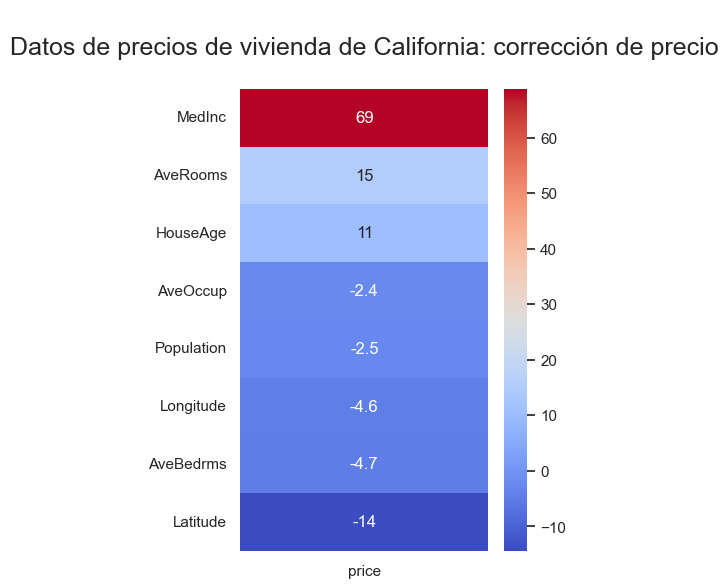

In [13]:
corr_to_target(df, 'price',
               'Datos de precios de vivienda de California: corrección de precio',
               './plot_blog_images/07_corr_to_price.jpg'
              )

---

## Function: Diagramas de dispersión de todas las funciones frente al objetivo


In [14]:
def gen_scatterplots(dataframe, target_column, list_of_columns, cols=1, file=None):
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()        

    for i, column in enumerate(list_of_columns):
        ax[i].scatter(dataframe[column],
                      dataframe[target_column],
                      color=color_choices[i % len(color_choices)],
                      alpha = 0.1)


        ax[i].set_ylabel(f'{target_column}', fontsize=14)
        ax[i].set_xlabel(f'{column}', fontsize=14)

    fig.suptitle('\nGráficos de dispersión de cada característica versus objetivo', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    return

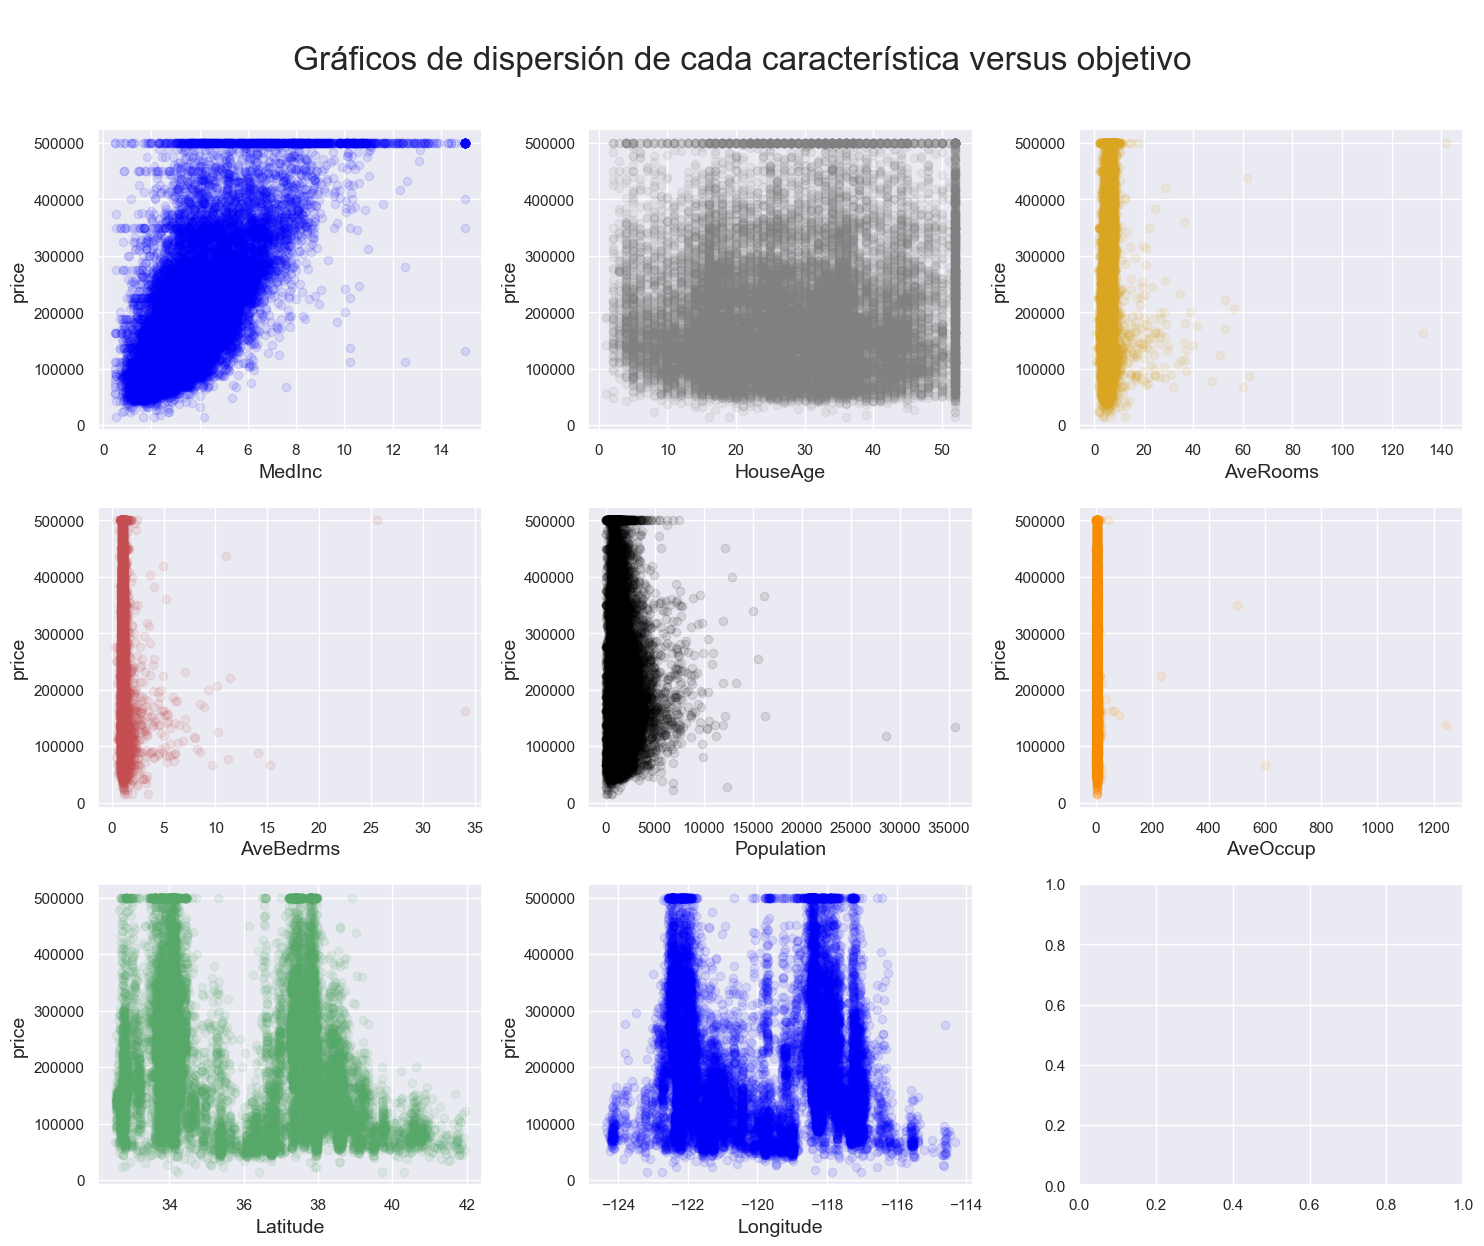

In [15]:
feature_cols = [col for col in df.columns if col != 'price']
gen_scatterplots(df, 'price',
                 feature_cols,
                 3,
                 './plot_blog_images/09_feature_target_scatter_plots.jpg'
                )

---

## Function:  N-a través de histogramas de cada variable


In [16]:
def gen_histograms(dataframe, cols=1, file=None):
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']
    ax = ax.ravel()         

    for i, column in enumerate(dataframe.columns):
        ax[i].hist(dataframe[column],
                      color=color_choices[i % len(color_choices)],
                      alpha = 1)
        
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_ylabel('Observations', fontsize=14)
        ax[i].set_xlabel('', fontsize=14)
        
    fig.suptitle('\nHistogramas para todas las variables en el marco de datose', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return

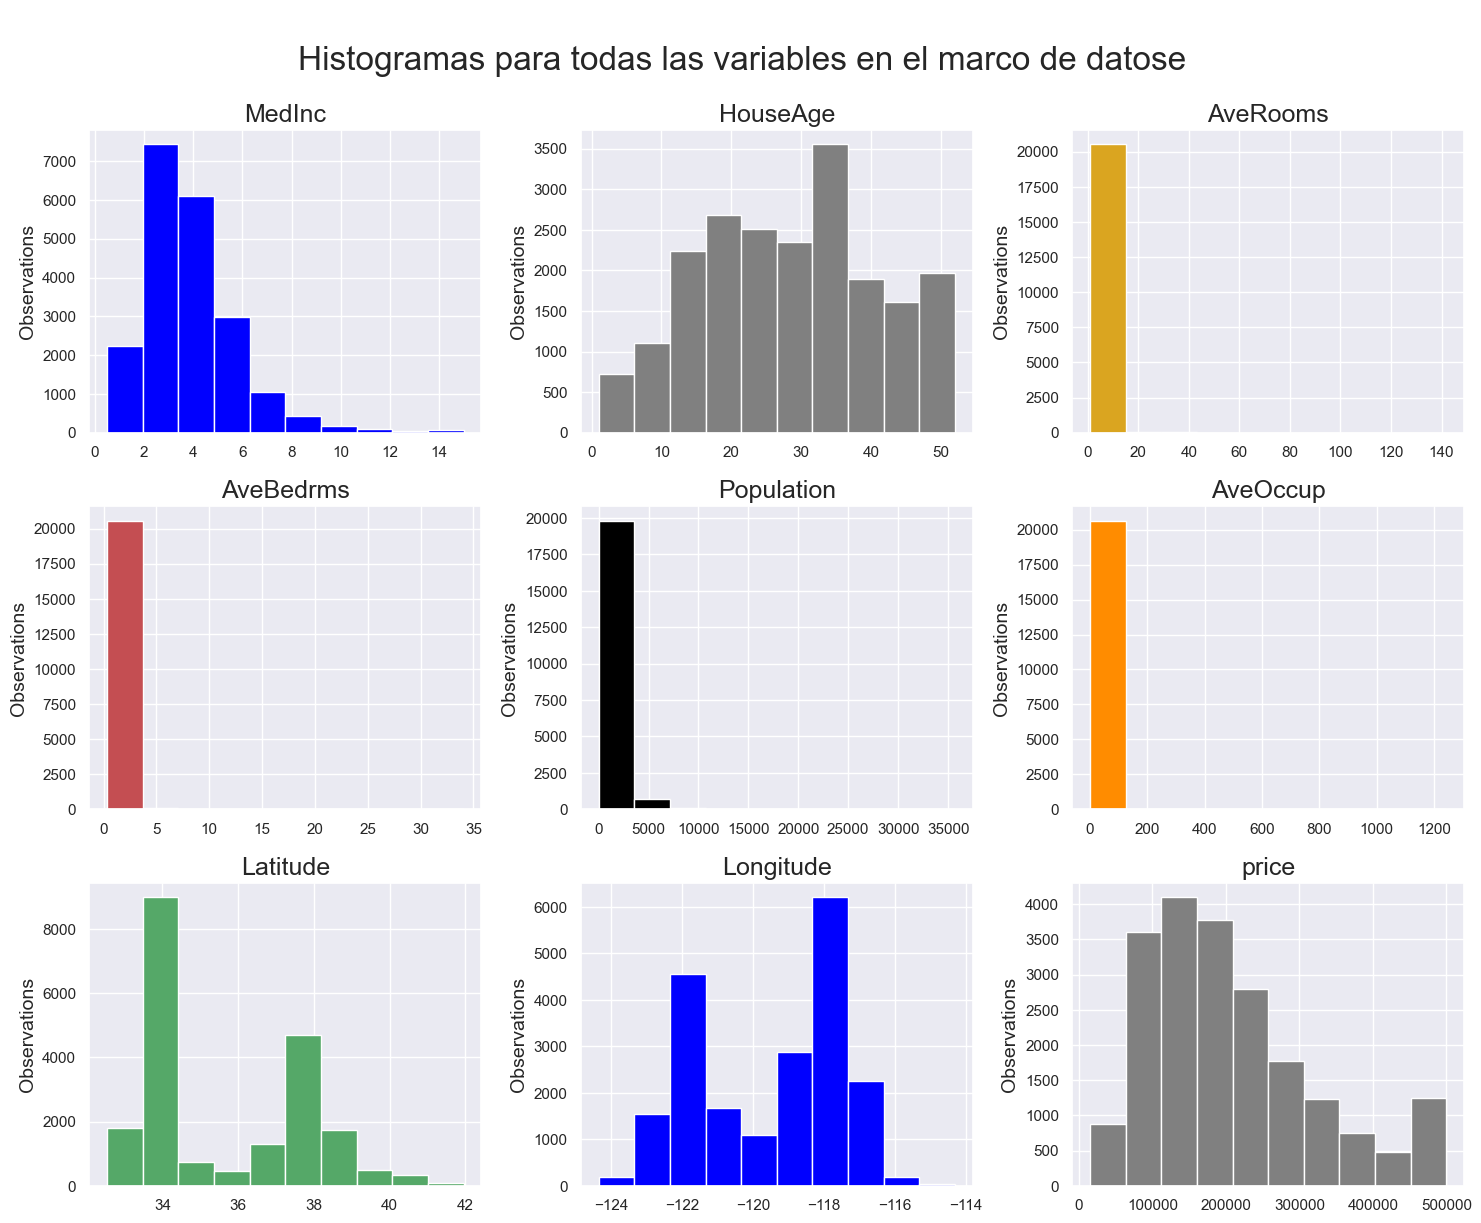

In [17]:
gen_histograms(df, 3,
               './plot_blog_images/11_all_var_histograms.jpg'
              )

---

## Function:  Boxplots


In [18]:
def gen_boxplots(dataframe, cols=1, file=None):
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()        

    for i, column in enumerate(dataframe.columns):
        ax[i].boxplot(dataframe[column])
        
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_ylabel('', fontsize=14)
        ax[i].set_xlabel('', fontsize=14)
        ax[i].tick_params(labelbottom=False)
        
    fig.suptitle('\nDiagramas de caja para todas las variables en el marco de datos', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return

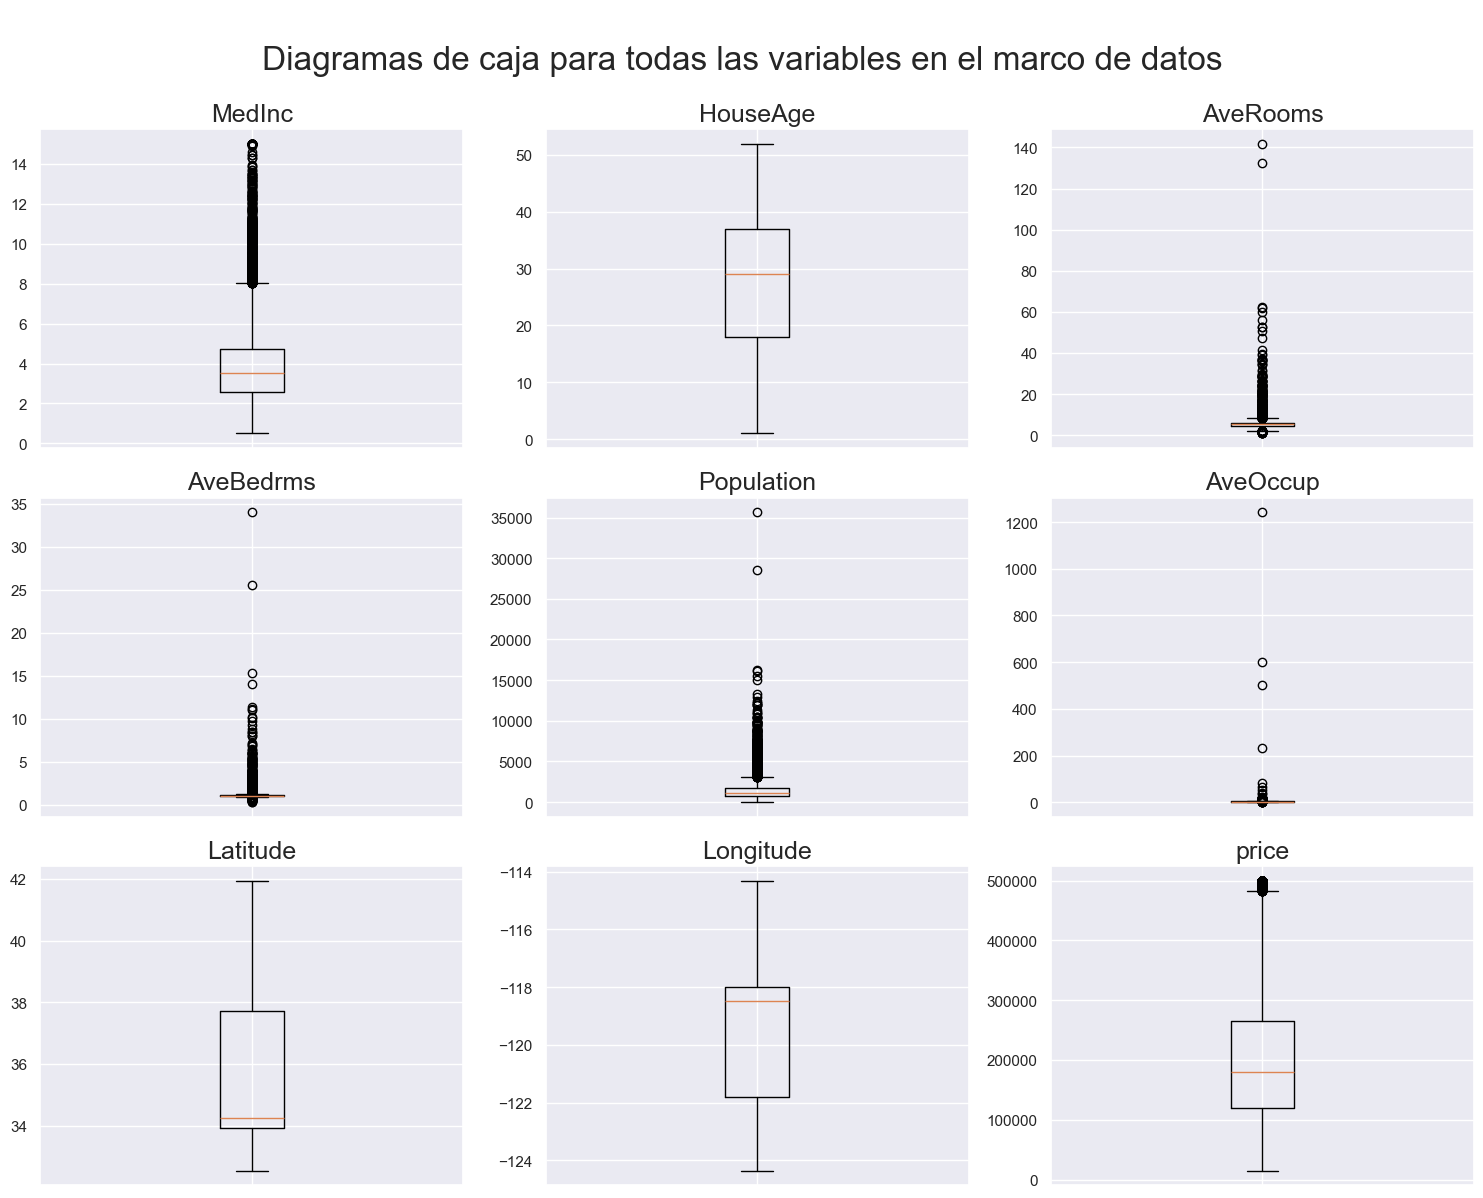

In [19]:
gen_boxplots(df, 3,
             './plot_blog_images/13_all_var_boxplots.jpg'
            )

---

## Function:  N-across Line Charts


In [20]:
def gen_linecharts(dataframe, cols=1, file=None):
    list_of_columns = list(dataframe.columns)
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()        

    for i, column in enumerate(list_of_columns):
        ax[i].plot(dataframe[column],
                   color=color_choices[i % len(color_choices)])
        
        ax[i].set_title(f'{column}', fontsize=18)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        
    fig.suptitle('\nGráficos de líneas para todas las variables en el marco de datos', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

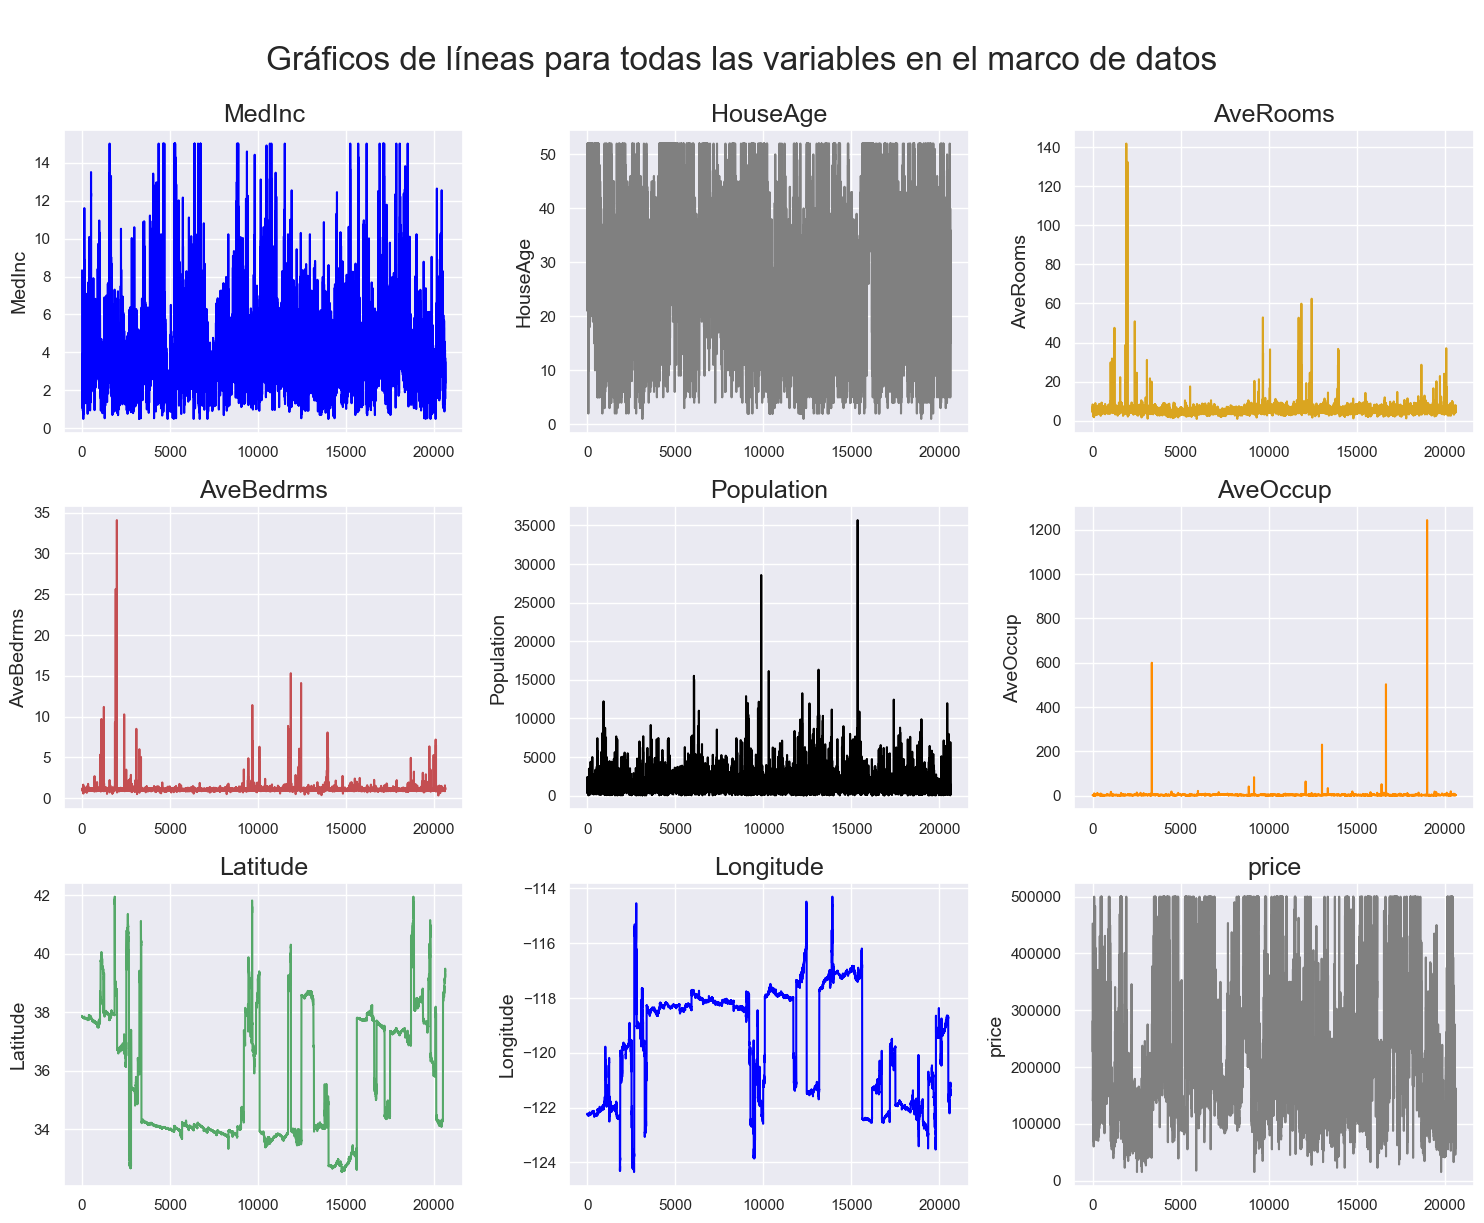

In [21]:
gen_linecharts(df, 3,
               './plot_blog_images/15_all_var_line_charts.jpg'
              )

---

## Function:  Gráficos de N líneas cruzadas con promedios móviles especificados por el usuario


In [22]:
def gen_linecharts_rolling(dataframe, roll_num, cols=1, file=None):
    list_of_columns = list(dataframe.columns)    
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows
    
    dataframe = dataframe.rolling(roll_num).mean()

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()        

    for i, column in enumerate(list_of_columns):
        ax[i].plot(dataframe[column],
                   color=color_choices[i % len(color_choices)])
        
        ax[i].set_title(f'{column}', fontsize=18)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        ax[i].set_xlabel('Time', fontsize=14)
        
    fig.suptitle('\nPromedio móvil. Gráficos de líneas (todas las variables)', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

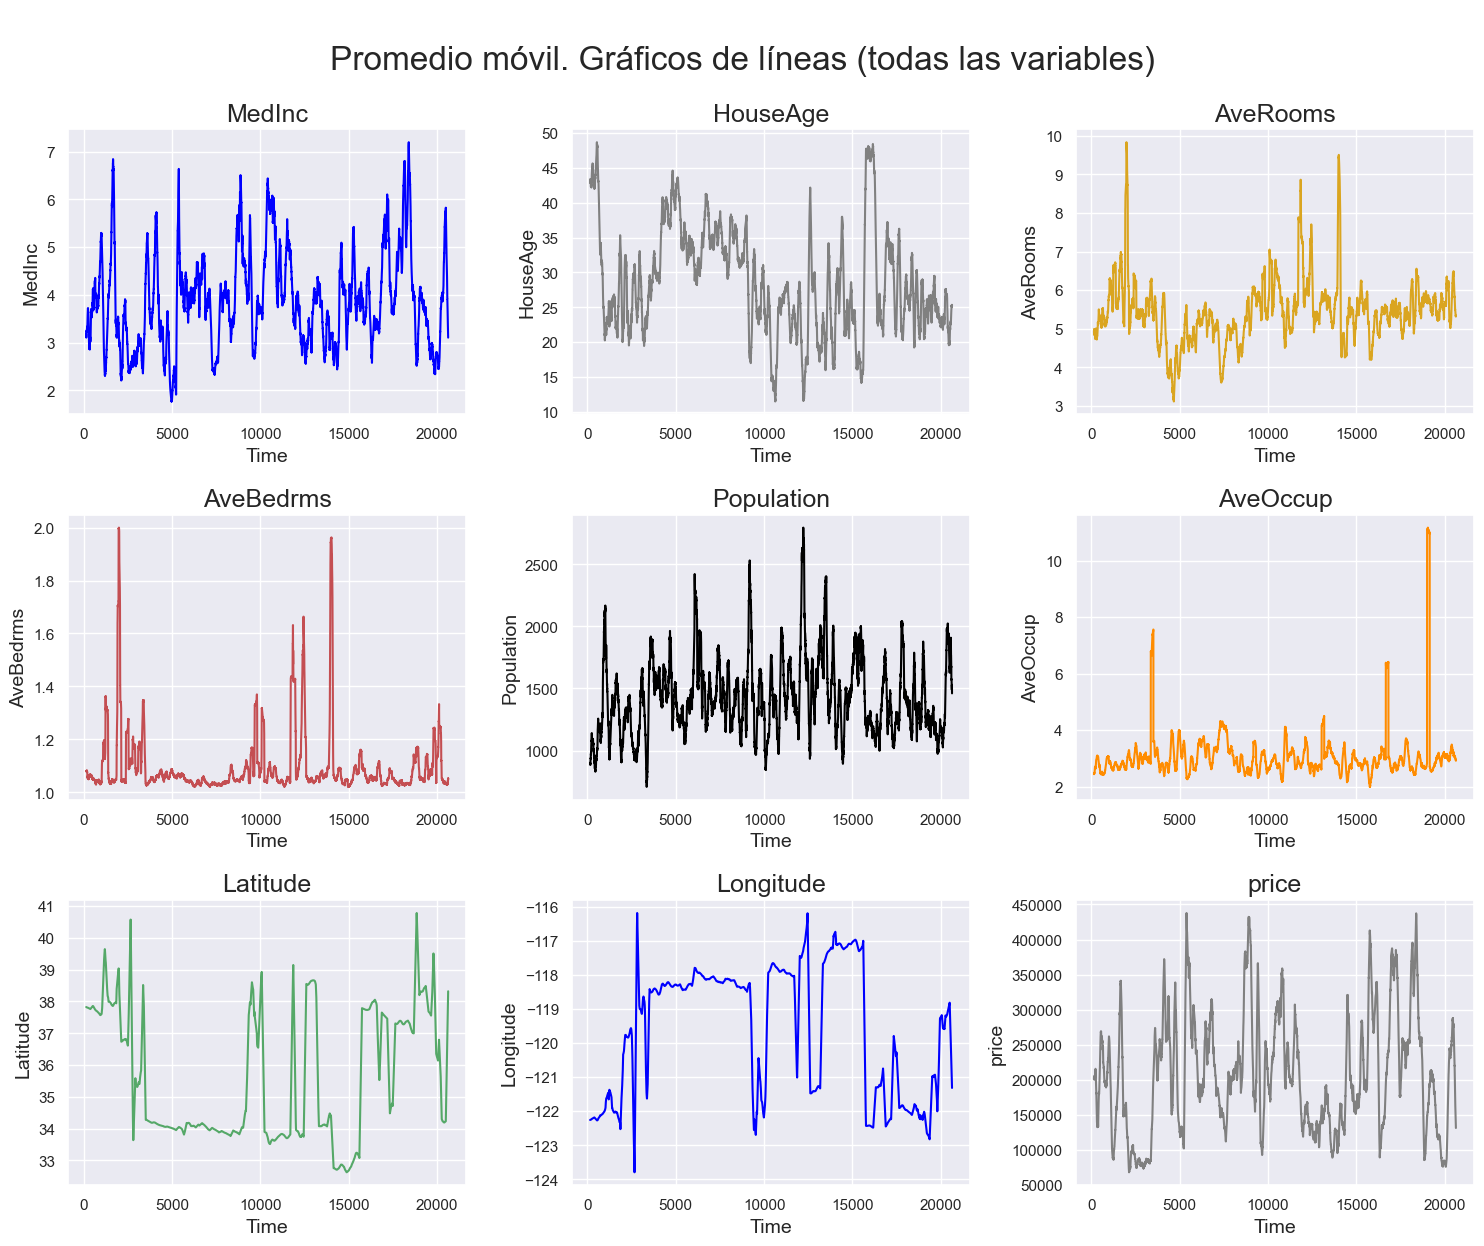

In [23]:
gen_linecharts_rolling(df, 150, 3,
                      './plot_blog_images/17_all_var_rolling_line_charts.jpg'
                      )

---

# Function: Pareto

In [24]:
def gen_pareto(dataframe, cols=1, file=None):
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    

    ax = ax.ravel()         

    for i, column in enumerate(dataframe.columns):

        # Calcular el porcentaje acumulado
        cumulative_percentage = dataframe[column].cumsum() / dataframe[column].sum() * 100

        # Encontrar el punto de corte para el 80%
        cutoff_index = (cumulative_percentage <= 80).sum()

        ax[i](sns.barplot(x= dataframe[column].index
                    , y= dataframe[column].values
                    , palette=['red' if i < cutoff_index else 'green' for i in range(len(dataframe[column]))]))
        
        
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_ylabel('Observations', fontsize=14)
        ax[i].set_xlabel('', fontsize=14)

        # Ajustar la línea para el punto de corte del 80%
        ax[i].twinx()
        ax[i].plot(range(len(dataframe[column])), cumulative_percentage, color='blue', marker='o', linestyle='-')

        
        
    fig.suptitle('\nPareto para todas las variables en el marco de datose', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return

In [1]:
gen_pareto(df, cols=2)

NameError: name 'gen_pareto' is not defined

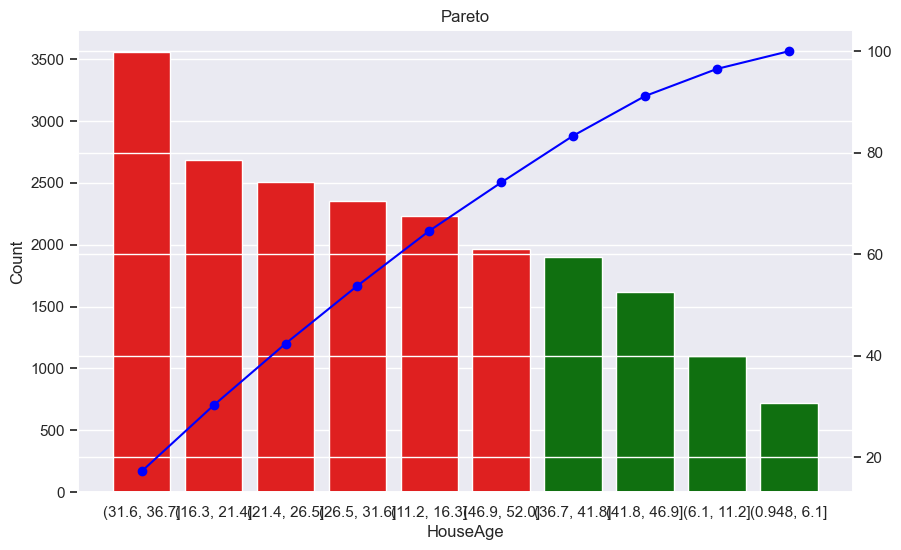

Punto de corte para el 80% de los resultados: (36.7, 41.8]


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular los recuentos de las edades en 10 bins
age_counts = df['HouseAge'].value_counts(bins=10, ascending=False)

# Ordenar los recuentos de mayor a menor
age_counts_sorted = age_counts.sort_values(ascending=False)

# Calcular el porcentaje acumulado
cumulative_percentage = age_counts_sorted.cumsum() / age_counts_sorted.sum() * 100

# Encontrar el punto de corte para el 80%
cutoff_index = (cumulative_percentage <= 80).sum()

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts_sorted.index, y=age_counts_sorted.values, palette=['red' if i < cutoff_index else 'green' for i in range(len(age_counts_sorted))])

# Establecer etiquetas de los ejes
plt.xlabel('HouseAge')
plt.ylabel('Count')
plt.title('Pareto')

# Ajustar la línea para el punto de corte del 80%
plt.twinx()
plt.plot(range(len(age_counts_sorted)), cumulative_percentage, color='blue', marker='o', linestyle='-')

# Mostrar el gráfico
plt.show()

print("Punto de corte para el 80% de los resultados:", age_counts_sorted.index[cutoff_index])

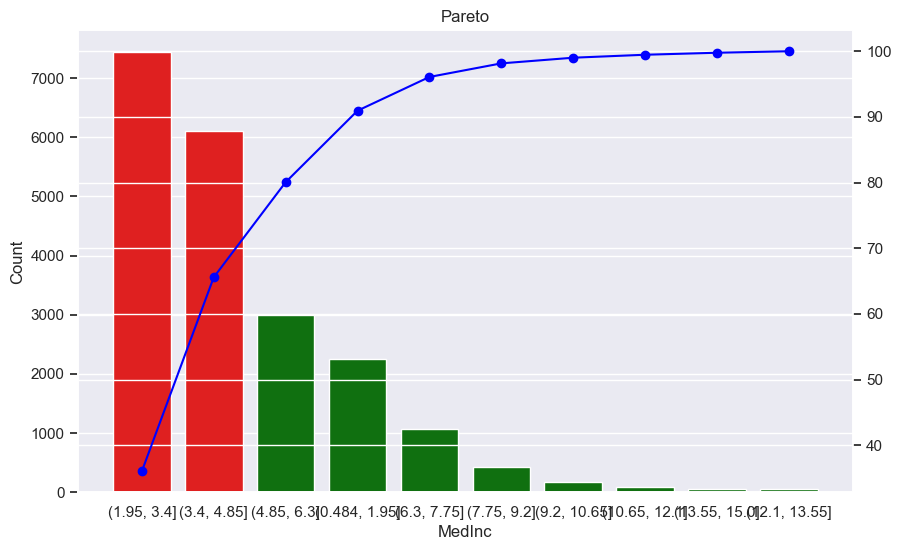

Punto de corte para el 80% de los resultados: (4.85, 6.3]


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular los recuentos de las edades en 10 bins
age_counts = df['MedInc'].value_counts(bins=10, ascending=False)

# Ordenar los recuentos de mayor a menor
age_counts_sorted = age_counts.sort_values(ascending=False)

# Calcular el porcentaje acumulado
cumulative_percentage = age_counts_sorted.cumsum() / age_counts_sorted.sum() * 100

# Encontrar el punto de corte para el 80%
cutoff_index = (cumulative_percentage <= 80).sum()

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts_sorted.index, y=age_counts_sorted.values, palette=['red' if i < cutoff_index else 'green' for i in range(len(age_counts_sorted))])

# Establecer etiquetas de los ejes
plt.xlabel('MedInc')
plt.ylabel('Count')
plt.title('Pareto')

# Ajustar la línea para el punto de corte del 80%
plt.twinx()
plt.plot(range(len(age_counts_sorted)), cumulative_percentage, color='blue', marker='o', linestyle='-')

# Mostrar el gráfico
plt.show()

print("Punto de corte para el 80% de los resultados:", age_counts_sorted.index[cutoff_index])